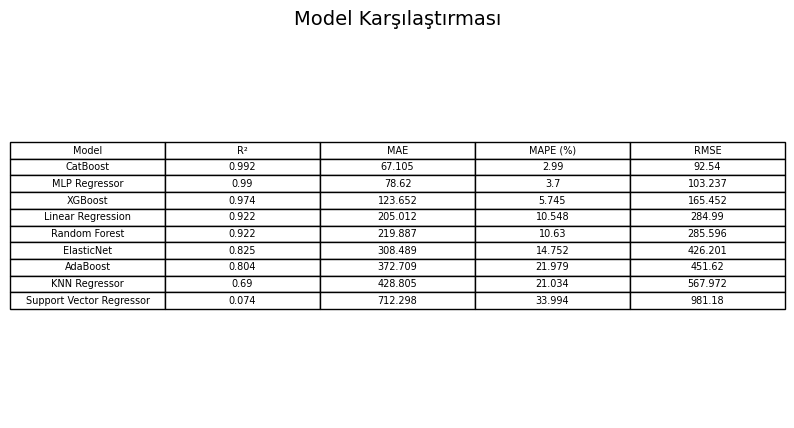

In [86]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

import matplotlib.pyplot as plt

df = pd.read_csv("df_encode_updated.csv").reset_index(drop=True)

X = df.drop(columns=["CarbonEmission"])
y = df["CarbonEmission"]

scaled_models = {
    "Linear Regression": LinearRegression(),
    "ElasticNet": ElasticNet(),
    "Support Vector Regressor": SVR(),
    "MLP Regressor": MLPRegressor(max_iter=2000),
    "KNN Regressor": KNeighborsRegressor()
}

tree_models = {
    "CatBoost": CatBoostRegressor(verbose=0),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "XGBoost": XGBRegressor()
}


results = []

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

for name, model in scaled_models.items():
    model.fit(X_train_s, y_train_s)
    y_pred = model.predict(X_test_s)

    r2 = r2_score(y_test_s, y_pred)
    mae = mean_absolute_error(y_test_s, y_pred)
    mape = np.mean(np.abs((y_test_s - y_pred) / y_test_s)) * 100
    rmse = np.sqrt(mean_squared_error(y_test_s, y_pred))

    results.append([name, r2, mae, mape, rmse])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, model in tree_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append([name, r2, mae, mape, rmse])

results_df = pd.DataFrame(results, columns=["Model", "R²", "MAE", "MAPE (%)", "RMSE"]).sort_values(by="R²", ascending=False).round(3)

fig, ax = plt.subplots(figsize=(10, 5))
ax.axis("tight")
ax.axis("off")
ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc="center", loc="center")
plt.title("Model Karşılaştırması", fontsize=14)
plt.show()


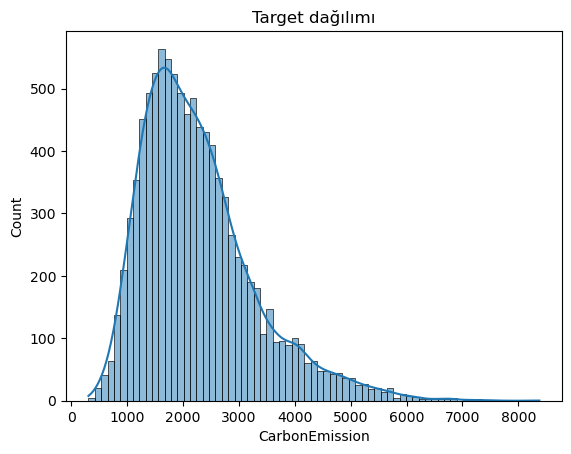

In [58]:
import seaborn as sns
sns.histplot(df["CarbonEmission"], kde=True)
plt.title("Target dağılımı")
plt.show()



CatBoost için Feature Importance:


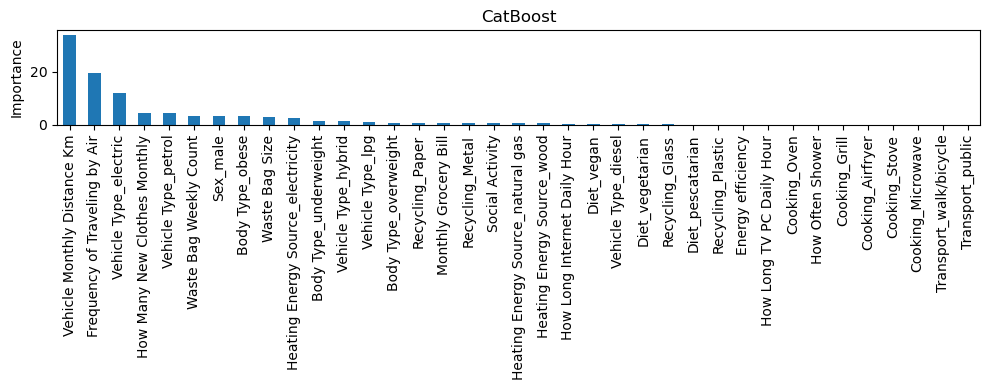


XGBoost için Feature Importance:


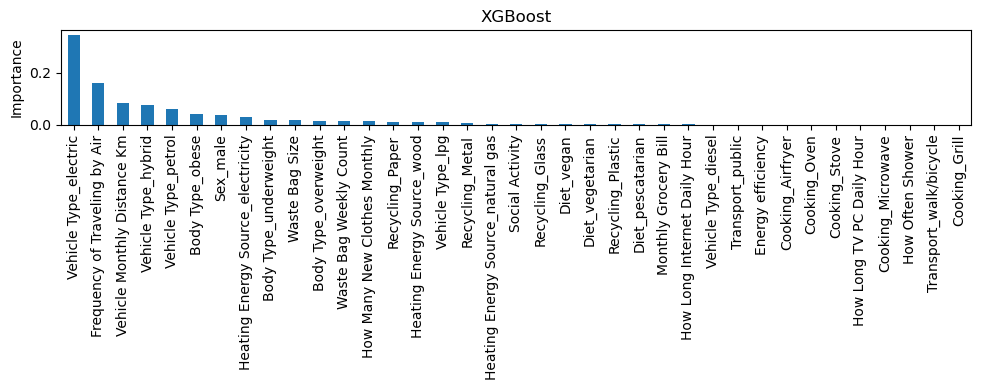


Random Forest için Feature Importance:


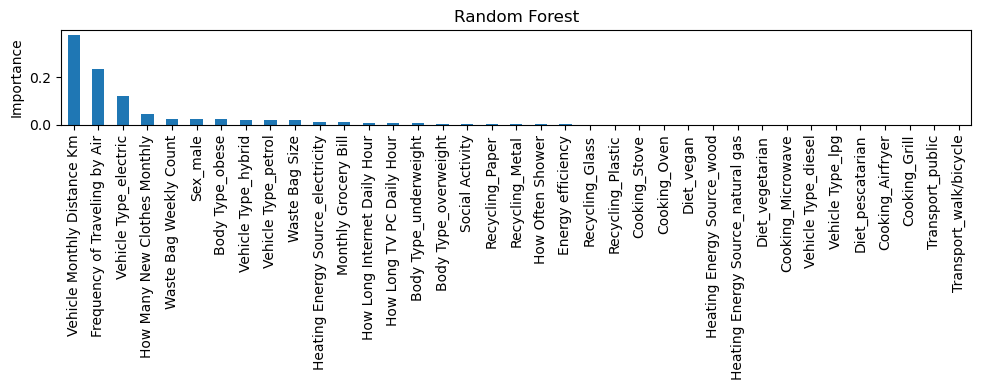

In [90]:
models_ = {
    "CatBoost": CatBoostRegressor(verbose=0),
    "XGBoost": XGBRegressor(),
    "Random Forest": RandomForestRegressor()
}


feature_importance_results = {}

for name, model in models_.items():
    model.fit(X_train, y_train)
    
    if name == "CatBoost":
        importances = model.get_feature_importance()
    else:
        importances = model.feature_importances_
    
    feature_importance_results[name] = pd.Series(importances, index=X_train.columns)

for name, importances in feature_importance_results.items():
    print(f"\n{name} için Feature Importance:")
    importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 4), title=name)
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()

In [94]:
from sklearn.ensemble import StackingRegressor, VotingRegressor

ensemble_models = {
    "Stacking": StackingRegressor(
        estimators=[
            ("cat", CatBoostRegressor(verbose=0)),
            ("mlp", MLPRegressor(max_iter=2000)),
            ("xgb", XGBRegressor())
        ],
        final_estimator=LinearRegression()
    ),
    "Voting": VotingRegressor([
        ("cat", CatBoostRegressor(verbose=0)),
        ("mlp", MLPRegressor(max_iter=2000)),
        ("xgb", XGBRegressor())
    ])
}

for name, model in ensemble_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append([name, r2, mae, mape, rmse])


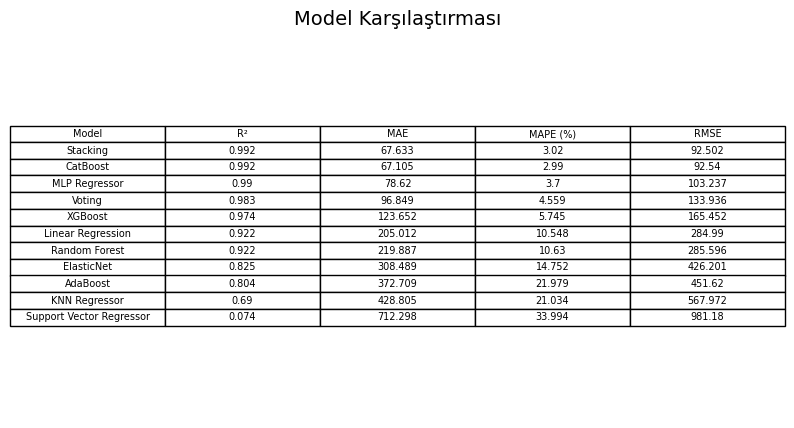

In [95]:
# Tüm sonuçları DataFrame olarak düzenle ve sırala
results_df = pd.DataFrame(results, columns=["Model", "R²", "MAE", "MAPE (%)", "RMSE"]).sort_values(by="R²", ascending=False).round(3)

# Hepsini şık tablo olarak göster
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis("tight")
ax.axis("off")
ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc="center", loc="center")
plt.title("Model Karşılaştırması", fontsize=14)
plt.show()
